In [1]:
# 중요도를 따져서 1로 코딩하기!
# 내가 바라보는 포커스의 경중을 따질 것
# 최소 데이터 셋은 500개 정도 이상 준비하기

폐암 수술 환자의 생존유무 예측하기 (1 : 생존 / 0 : 사망)

## 데이터 준비하기

In [2]:
# 라이브러리 임포트
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense

# 랜덤 시드 고정시키기
np.random.seed(5)

In [3]:
dataset = np.loadtxt('/content/ThoraricSurgery.csv', delimiter=',' )
dataset.shape

# 내 데이터 셋이 전부 숫자이므로 numpy로 불러올 수 있다.
# loadtxt()를 활용하여 처음부터 넘파이 배열로 가져올 수 있음
# 스케일 조정을 해서 성능을 향상시킬 수 있음

(470, 18)

## 데이터 셋 생성하기 
- 입력(속성값 17개), 출력(사망 여부 1개 : 정답지) 변수로 분리하기

In [4]:
# 학습 데이터
# X_train에 학습 데이터 420개와 17개 변수 가져오기
X_train = dataset[:420, 0:17]
y_train = dataset[:420, 17]

# test 데이터 68개와 1개 변수 가져오기
X_test = dataset[420:, 0:17]
y_test = dataset[420:, 17]

X_train.shape

(420, 17)

## 모델 구성하기

In [5]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))

# 출력 뉴런은 점점 줄여나가기(요약하면서 나가기)
# 이진분류이기 때문에 1개의 출력이 나와야 한다.

## 모델 학습과정 설정하기

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 모델 학습 시키기

In [7]:
history = model.fit(X_train, y_train, 
                    epochs=100,
                    batch_size=64)

# loss가 떨어지는가?? 
# accuracy가 올라가는가??
# -- 정답과 가까워지고 있다.

Epoch 1/100
7/7 [==============================] - 14s 3ms/step - loss: 20.8128 - accuracy: 0.1419
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 5.1263 - accuracy: 0.1398
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2633 - accuracy: 0.1251
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7336 - accuracy: 0.1260
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 1.9851 - accuracy: 0.1518
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 1.2698 - accuracy: 0.1243
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1296 - accuracy: 0.1523
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.1531
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.1395
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.1408
Epoch 11/100
7/7 [=========

## 학습결과 그려보기

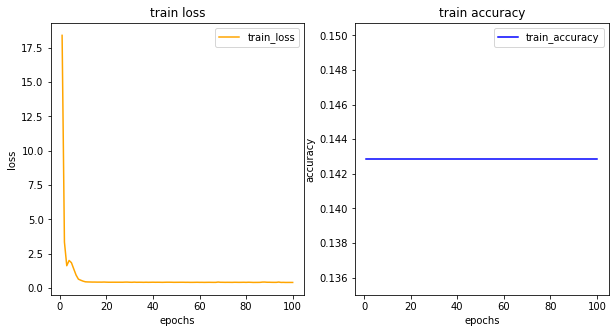

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()


## 모델 평가하기

In [9]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 1s 5ms/step - loss: 0.5088 - accuracy: 0.2000
accuracy: 20.00%


## 모델 성능 평가

In [10]:
# ROC 커브 그려보기

def plot_auc_roc(model):
    probs = model.predict_classes(X_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


## 모델 예측하기

In [11]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.])

In [12]:
result = model.predict(X_test)
# predict_classes()는 0과 1로 알려주는 함수
result

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [13]:
from sklearn import metrics
report = metrics.classification_report(y_test, result)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.20      1.00      0.33        10

    accuracy                           0.20        50
   macro avg       0.10      0.50      0.17        50
weighted avg       0.04      0.20      0.07        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# precision, recall 출력하기


print(metrics.precision_score(y_test, result))
print(metrics.recall_score(y_test, result))

0.2
1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


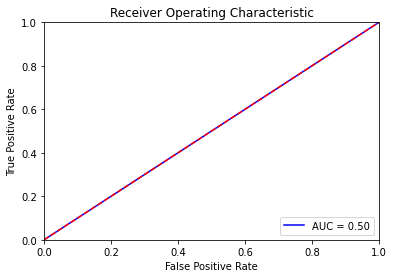

In [15]:
plot_auc_roc(model)